# Unit 5 - Financial Planning

In [63]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [25]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
print(json.dumps(btc_price, indent=4))
btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
print(json.dumps(eth_price, indent=4))
eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18740756,
            "total_supply": 18740756,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 32469.0,
                    "volume_24h": 59322931294,
                    "market_cap": 604216644776,
                    "percentage_change_1h": -1.60369998701773,
                    "percentage_change_24h": 2.8862469739675,
                    "percentage_change_7d": -20.0746848837591,
                    "percent_change_1h": -1.60369998701773,
                    "percent_change_24h": 2.8862469739675,
                    "percent_change_7d": -20.0746848837591
                },
                "CAD": {
                    "price": 39959.5983,
                    "volume_24h": 73008731543.5258,
                    "ma

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [17]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_aggspy = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_aggspy

# (use a limit=1000 parameter to call the most recent 1000 days of data)
start = pd.Timestamp("2020-06-18", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-06-18", tz="America/New_York").isoformat()

df_aggspy1000 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_aggspy1000.head(10)

AGG                                         SPY  \
                             open     high      low   close   volume     open   
time                                                                            
2020-06-18 00:00:00-04:00  117.88  117.880  117.640  117.79  5689912  310.005   
2020-06-19 00:00:00-04:00  117.80  117.970  117.740  117.83  5269076  314.170   
2020-06-22 00:00:00-04:00  118.00  118.000  117.730  117.77  3189556  307.990   
2020-06-23 00:00:00-04:00  117.79  117.825  117.690  117.72  3845665  313.490   
2020-06-24 00:00:00-04:00  117.70  117.840  117.610  117.75  4714563  309.840   
2020-06-25 00:00:00-04:00  117.94  117.950  117.800  117.85  4338474  303.470   
2020-06-26 00:00:00-04:00  117.99  118.080  117.845  118.02  5537471  306.160   
2020-06-29 00:00:00-04:00  118.01  118.110  117.950  118.09  3212966  301.410   
2020-06-30 00:00:00-04:00  118.28  118.320  117.980  118.20  5643934  303.990   
2020-07-01 00:00:00-04:00  117.90  118.070  117.760  118.03  6247232  309.570   

                                                                
                             high       low   close     volume  
time                                                            
2020-06-18 00:00:00-04:00  312.30  309.5100  311.74  128833528  
2020-06-19 00:00:00-04:00  314.38  306.5300  308.56  223746346  
2020-06-22 00:00:00-04:00  311.05  306.7500  310.68   61103957  
2020-06-23 00:00:00-04:00  314.49  311.6101  312.03   56029323  
2020-06-24 00:00:00-04:00  310.51  302.1000  304.12  109892325  
2020-06-25 00:00:00-04:00  307.64  301.2800  307.31   74516605  
2020-06-26 00:00:00-04:00  306.39  299.4200  300.01  100618111  
2020-06-29 00:00:00-04:00  304.45  298.9300  304.43   64142958  
2020-06-30 00:00:00-04:00  310.20  303.8200  308.57   79864685  
2020-07-01 00:00:00-04:00  311.89  309.0700  310.57   59243827

In [54]:
# Pick AGG and SPY close prices
agg_close_price = df_aggspy['AGG']['close'][0]
spy_close_price = df_aggspy['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.96
Current SPY closing price: $420.85


In [55]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21042.50
The current value of your 200 AGG shares is $22992.00


### Savings Health Analysis

In [78]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({'Amounts':[crypto, shares]})
index = ['crypto', 'shares']
df_savings.index = index

# Display savings DataFrame
df_savings

,Amounts
crypto,48956.586
shares,44034.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amounts'>

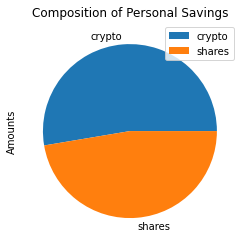

In [84]:
# Plot savings pie chart
df_savings.plot.pie(y='Amounts', title='Composition of Personal Savings')


In [80]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in total savings!')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal!')
elif total_savings < emergency_fund:
    print(f'You are ${emergency_fund - total_savings:0.2f} away from your goal!')

Congratulations! You have enough money in total savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-18', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_aggspy1000_ret = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df


# Display sample data
df_aggspy1000_ret.head()

AGG                                        SPY  \
                             open     high     low   close   volume     open   
time                                                                           
2020-06-18 00:00:00-04:00  117.88  117.880  117.64  117.79  5689912  310.005   
2020-06-19 00:00:00-04:00  117.80  117.970  117.74  117.83  5269076  314.170   
2020-06-22 00:00:00-04:00  118.00  118.000  117.73  117.77  3197077  307.990   
2020-06-23 00:00:00-04:00  117.79  117.825  117.69  117.72  3845665  313.490   
2020-06-24 00:00:00-04:00  117.70  117.840  117.61  117.75  4714563  309.840   

                                                                
                             high       low   close     volume  
time                                                            
2020-06-18 00:00:00-04:00  312.30  309.5100  311.74   64298819  
2020-06-19 00:00:00-04:00  314.38  306.5300  308.56  111140318  
2020-06-22 00:00:00-04:00  311.05  306.7500  310.68   64108242  
2020-06-23 00:00:00-04:00  314.50  311.6101  312.03   59566038  
2020-06-24 00:00:00-04:00  310.51  302.1000  304.12  114533687

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = df_aggspy1000_ret,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
MC_40_60.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2020-06-18 00:00:00-04:00  117.88  117.880  117.64  117.79  5689912   
2020-06-19 00:00:00-04:00  117.80  117.970  117.74  117.83  5269076   
2020-06-22 00:00:00-04:00  118.00  118.000  117.73  117.77  3197077   
2020-06-23 00:00:00-04:00  117.79  117.825  117.69  117.72  3845665   
2020-06-24 00:00:00-04:00  117.70  117.840  117.61  117.75  4714563   

                                            SPY                            \
                          daily_return     open    high       low   close   
time                                                                        
2020-06-18 00:00:00-04:00          NaN  310.005  312.30  309.5100  311.74   
2020-06-19 00:00:00-04:00     0.000340  314.170  314.38  306.5300  308.56   
2020-06-22 00:00:00-04:00    -0.000509  307.990  311.05  306.7500  310.68   
2020-06-23 00:00:00-04:00    -0.000425  313.490  314.50  311.6101  312.03   
2020-06-24 00:00:00-04:00     0.000255  309.840  310.51  302.1000  304.12   

                                                   
                              volume daily_return  
time                                               
2020-06-18 00:00:00-04:00   64298819          NaN  
2020-06-19 00:00:00-04:00  111140318    -0.010201  
2020-06-22 00:00:00-04:00   64108242     0.006871  
2020-06-23 00:00:00-04:00   59566038     0.004345  
2020-06-24 00:00:00-04:00  114533687    -0.025350

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993787,1.002905,1.000627,1.005936,0.999422,0.995821,1.004238,0.994518,1.003359,0.997312,...,1.003619,1.000898,0.994640,1.010217,0.991184,1.001608,1.004130,0.999381,0.994620,1.001606
2,1.000973,0.998693,1.005008,1.018596,0.990396,0.993349,0.993017,0.992543,1.006111,1.008956,...,1.008474,1.003002,1.006138,1.008964,0.994383,1.010328,0.995496,1.004402,0.995425,0.999062
3,1.004488,1.008067,0.999046,1.013238,0.985822,1.006669,0.995058,0.997827,0.999314,1.012595,...,1.005962,0.999243,1.001832,1.005041,0.994087,1.000720,0.997540,0.997468,1.000676,1.004788
4,1.008603,1.007988,1.005167,1.011089,0.985098,0.995971,0.994947,0.993942,1.004962,1.021093,...,1.005241,0.994857,1.000023,1.002678,1.003944,0.999825,1.003694,0.998998,0.999231,1.016508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,94.098022,128.306702,236.871183,117.119351,129.810807,139.184913,157.189958,116.113316,148.613406,471.583741,...,95.457272,225.336017,47.680101,145.028538,190.279050,126.556261,227.426993,204.210167,256.942865,98.810864
7557,94.271838,128.152429,237.814009,118.102613,129.907092,138.061760,158.278417,116.690696,149.729032,475.727848,...,95.630310,225.242636,47.597758,144.947206,190.912792,125.882130,227.006754,204.073968,256.895598,98.955723
7558,93.794765,126.826509,236.028406,119.177455,130.913277,139.298031,159.669512,117.254378,148.560309,475.058928,...,94.775276,226.042978,47.609583,144.860976,190.918084,126.843619,226.933035,205.106123,258.702998,98.240676
7559,94.135023,126.189943,237.582992,118.785153,130.685600,139.150229,159.236525,117.724466,150.266089,466.860482,...,94.244852,227.499428,47.215857,145.199674,191.728766,126.807619,227.456151,204.637987,257.228106,99.019135


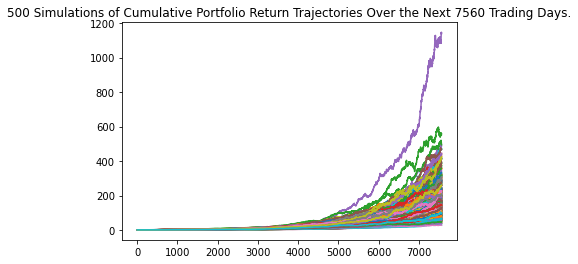

In [34]:
# Plot simulation outcomes
line_plot = MC_40_60.plot_simulation()

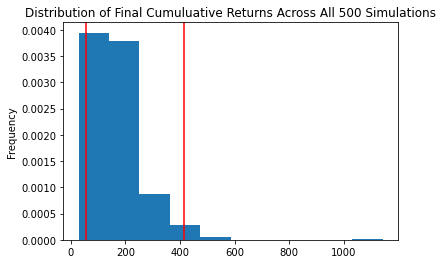

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_40_60.plot_distribution()

### Retirement Analysis

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
ret30_tbl = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(ret30_tbl)

count            500.000000
mean             169.164029
std               96.320593
min               28.384926
25%              105.273876
50%              151.243036
75%              206.361298
max             1143.244359
95% CI Lower      54.664176
95% CI Upper     414.043755
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [39]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ret30_ci_lower = round(ret30_tbl[8] * 20000,2)
ret30_ci_upper = round(ret30_tbl[9] * 20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ret30_ci_lower} and ${ret30_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1093283.52 and $8280875.1


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ret30_ci_lower = round(ret30_tbl[8] * 30000,2)
ret30_ci_upper = round(ret30_tbl[9] * 30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ret30_ci_lower} and ${ret30_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1639925.28 and $12421312.65


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = df_aggspy1000_ret,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_40_60.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2020-06-18 00:00:00-04:00  117.88  117.880  117.64  117.79  5689912   
2020-06-19 00:00:00-04:00  117.80  117.970  117.74  117.83  5269076   
2020-06-22 00:00:00-04:00  118.00  118.000  117.73  117.77  3197077   
2020-06-23 00:00:00-04:00  117.79  117.825  117.69  117.72  3845665   
2020-06-24 00:00:00-04:00  117.70  117.840  117.61  117.75  4714563   

                                            SPY                            \
                          daily_return     open    high       low   close   
time                                                                        
2020-06-18 00:00:00-04:00          NaN  310.005  312.30  309.5100  311.74   
2020-06-19 00:00:00-04:00     0.000340  314.170  314.38  306.5300  308.56   
2020-06-22 00:00:00-04:00    -0.000509  307.990  311.05  306.7500  310.68   
2020-06-23 00:00:00-04:00    -0.000425  313.490  314.50  311.6101  312.03   
2020-06-24 00:00:00-04:00     0.000255  309.840  310.51  302.1000  304.12   

                                                   
                              volume daily_return  
time                                               
2020-06-18 00:00:00-04:00   64298819          NaN  
2020-06-19 00:00:00-04:00  111140318    -0.010201  
2020-06-22 00:00:00-04:00   64108242     0.006871  
2020-06-23 00:00:00-04:00   59566038     0.004345  
2020-06-24 00:00:00-04:00  114533687    -0.025350

In [42]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003234,1.008880,0.995264,1.003495,1.001128,1.003151,1.013608,0.993680,1.005753,1.012101,...,1.000613,1.002897,0.997883,0.997510,1.003046,0.998376,1.009027,0.990536,1.004196,0.999669
2,0.999386,1.003900,1.007689,1.000286,1.001315,0.999866,1.013952,0.998442,0.997469,1.010350,...,0.997730,1.007643,0.998237,1.000826,0.995391,0.993187,1.005735,0.990511,1.002534,1.012353
3,1.007167,1.009645,0.999733,1.003742,0.997370,1.000332,1.027008,0.999062,0.986870,1.007413,...,0.990312,1.005678,0.998883,0.993743,0.999692,0.987497,1.010254,0.999075,1.009797,1.006959
4,1.011354,1.005098,1.001609,1.012982,0.994108,1.001142,1.025715,0.997536,0.984375,1.007950,...,0.997885,1.004395,0.992357,0.998668,1.011844,0.998146,1.005143,1.007495,1.006523,0.993872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.033846,2.431079,1.471458,2.336289,2.116944,2.062857,3.010459,2.803515,2.495540,2.175384,...,1.823271,2.377493,1.970004,2.123591,2.272261,2.095196,2.166428,1.852683,2.456178,1.913713
1257,2.031225,2.416840,1.459741,2.345881,2.145946,2.070912,3.012785,2.785546,2.511594,2.173906,...,1.819391,2.361968,1.973314,2.130365,2.255649,2.092581,2.153431,1.847600,2.452646,1.919356
1258,2.009157,2.400431,1.437738,2.343440,2.150711,2.053032,3.039487,2.770012,2.509178,2.164084,...,1.806905,2.354487,1.970520,2.112810,2.253819,2.092860,2.175313,1.855720,2.464677,1.931309
1259,2.033340,2.371802,1.439076,2.336768,2.136806,2.054086,3.017523,2.757641,2.526386,2.145262,...,1.822226,2.365723,1.956390,2.133843,2.234731,2.085036,2.179956,1.870859,2.481313,1.942889


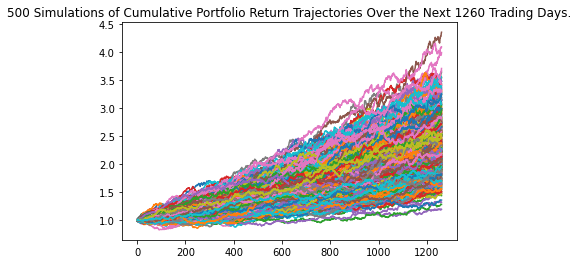

In [43]:
# Plot simulation outcomes
ret5_plot = MC_40_60.plot_simulation()

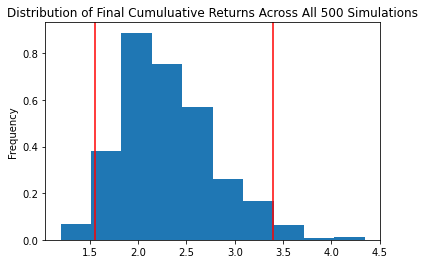

In [44]:
# Plot probability distribution and confidence intervals
ret5_dist_plot = MC_40_60.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
ret5_tbl = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(ret5_tbl)

count           500.000000
mean              2.311910
std               0.491848
min               1.195456
25%               1.963306
50%               2.234515
75%               2.600485
max               4.347291
95% CI Lower      1.554254
95% CI Upper      3.399287
Name: 1260, dtype: float64


In [46]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ret5_ci_lower = round(ret5_tbl[8] * 60000,2)
ret5_ci_upper = round(ret5_tbl[9] * 60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ret5_ci_lower} and ${ret5_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $93255.25 and $203957.23


### Ten Years Retirement Option

In [47]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40_60 = MCSimulation(
    portfolio_data = df_aggspy1000_ret,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_40_60.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
time                                                                  
2020-06-18 00:00:00-04:00  117.88  117.880  117.64  117.79  5689912   
2020-06-19 00:00:00-04:00  117.80  117.970  117.74  117.83  5269076   
2020-06-22 00:00:00-04:00  118.00  118.000  117.73  117.77  3197077   
2020-06-23 00:00:00-04:00  117.79  117.825  117.69  117.72  3845665   
2020-06-24 00:00:00-04:00  117.70  117.840  117.61  117.75  4714563   

                                            SPY                            \
                          daily_return     open    high       low   close   
time                                                                        
2020-06-18 00:00:00-04:00          NaN  310.005  312.30  309.5100  311.74   
2020-06-19 00:00:00-04:00     0.000340  314.170  314.38  306.5300  308.56   
2020-06-22 00:00:00-04:00    -0.000509  307.990  311.05  306.7500  310.68   
2020-06-23 00:00:00-04:00    -0.000425  313.490  314.50  311.6101  312.03   
2020-06-24 00:00:00-04:00     0.000255  309.840  310.51  302.1000  304.12   

                                                   
                              volume daily_return  
time                                               
2020-06-18 00:00:00-04:00   64298819          NaN  
2020-06-19 00:00:00-04:00  111140318    -0.010201  
2020-06-22 00:00:00-04:00   64108242     0.006871  
2020-06-23 00:00:00-04:00   59566038     0.004345  
2020-06-24 00:00:00-04:00  114533687    -0.025350

In [48]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_40_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007471,0.998537,1.001892,1.007712,0.999214,0.990331,0.993910,1.003661,0.986417,0.987066,...,0.995201,0.992802,1.010395,0.999942,0.998959,1.006752,1.001016,0.998010,0.990613,1.000740
2,0.998842,0.984367,0.998578,1.003551,0.994946,0.988509,0.985322,1.003857,0.988394,0.982138,...,1.002643,0.992276,1.013278,1.004871,1.007273,1.005244,0.999002,1.002271,0.989716,1.002962
3,0.994512,0.987797,1.004266,0.999732,0.983984,0.985169,0.998926,0.991897,0.996416,0.981815,...,1.010899,0.992677,1.015284,1.004092,1.009203,1.009766,1.005529,1.008253,0.999161,1.008122
4,0.993256,0.983933,0.992323,0.997422,0.984932,0.987127,1.011660,0.993770,1.003274,0.988728,...,1.004865,0.990513,1.010096,1.000995,1.008780,1.008083,1.006845,1.006824,0.997141,1.017657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,11.001977,4.366311,3.754649,6.265013,4.673351,3.264587,7.457398,6.587412,4.664197,6.068131,...,6.655413,4.404988,6.664305,6.264006,5.926092,3.749766,5.030266,7.636725,4.338295,4.397686
2517,11.063785,4.377798,3.753028,6.241706,4.677907,3.280436,7.462787,6.691816,4.664818,6.020015,...,6.608555,4.395456,6.573040,6.249793,5.979995,3.776883,5.032669,7.670631,4.302340,4.388648
2518,11.048200,4.376389,3.745657,6.280901,4.700408,3.289274,7.428273,6.739933,4.691516,6.004075,...,6.629263,4.418949,6.601948,6.250641,5.941283,3.768742,5.042372,7.588036,4.291821,4.369816
2519,11.200187,4.392187,3.774773,6.262847,4.748058,3.307962,7.375602,6.732542,4.640348,6.030873,...,6.589764,4.435850,6.628235,6.260557,5.953337,3.764192,5.024737,7.528160,4.306860,4.357804


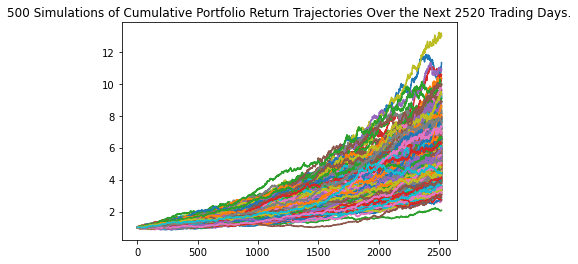

In [49]:
# Plot simulation outcomes
ret10_plot = MC_40_60.plot_simulation()

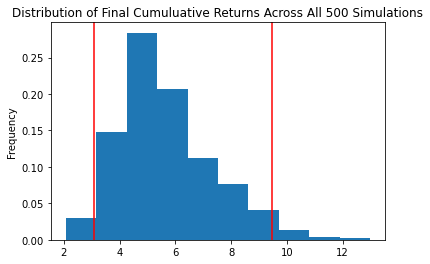

In [50]:
# Plot probability distribution and confidence intervals
ret10_dist_plot = MC_40_60.plot_distribution()

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
ret10_tbl = MC_40_60.summarize_cumulative_return()

# Print summary statistics
print(ret10_tbl)

count           500.000000
mean              5.636359
std               1.679713
min               2.074297
25%               4.433401
50%               5.323169
75%               6.519435
max              12.982893
95% CI Lower      3.088318
95% CI Upper      9.465459
Name: 2520, dtype: float64


In [52]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ret10_ci_lower = round(ret10_tbl[8] * 60000,2)
ret10_ci_upper = round(ret10_tbl[9] * 60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ret10_ci_lower} and ${ret10_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $185299.05 and $567927.51
